In [2]:
print("hello to check")

hello to check


In [3]:
import numpy as np
import matplotlib.pyplot as plt
#import pygame

import keras
from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [3]:
#mnist.load_data?

In [4]:
(X_train, y_train), (X_test, y_test)=mnist.load_data()
X_train.shape , y_train.shape , X_test.shape ,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
def plot_input_img(i):
    plt.imshow(X_train[i] , cmap='binary')
    plt.title(y_train[i])
    plt.axis('off')
    plt.show()

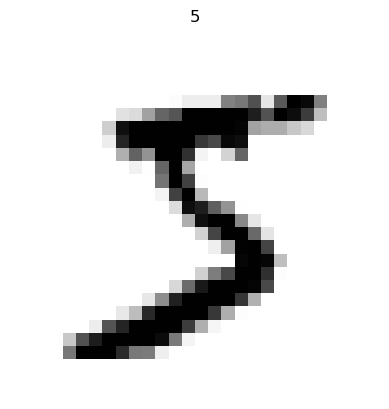

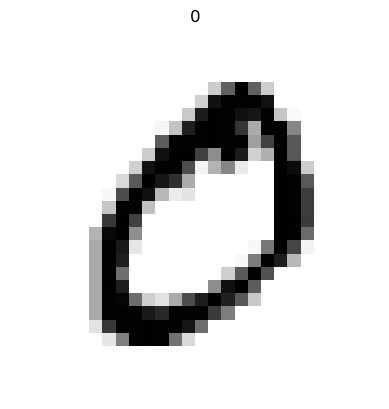

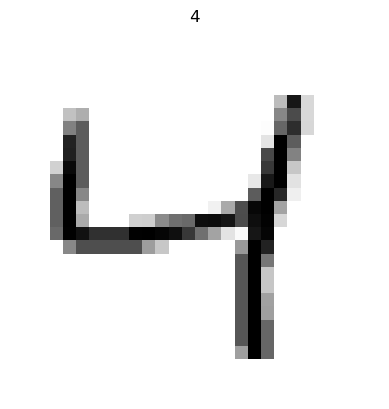

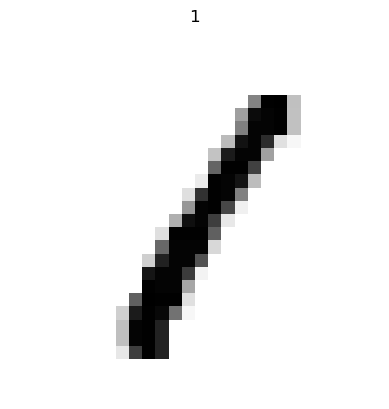

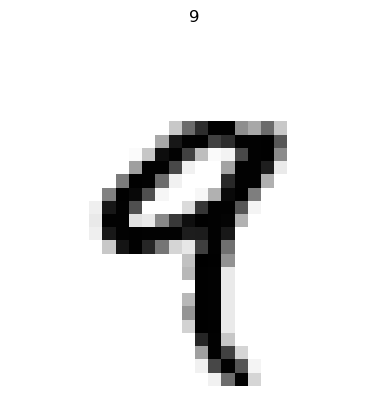

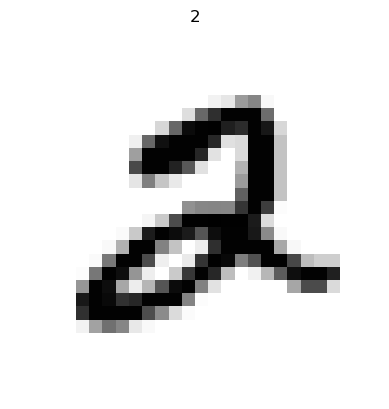

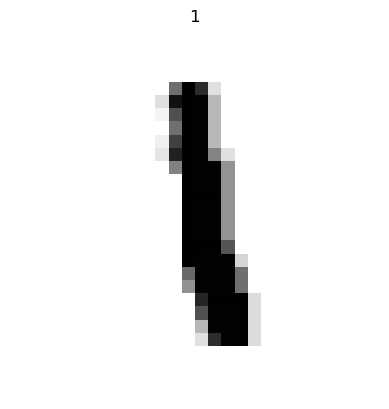

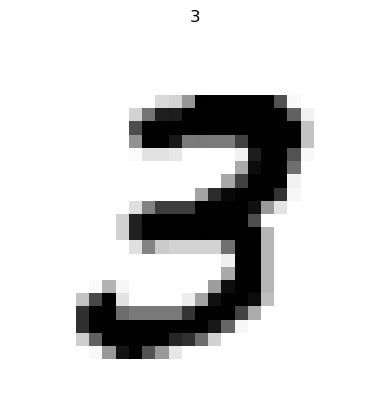

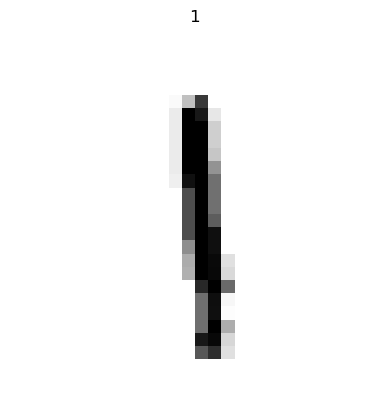

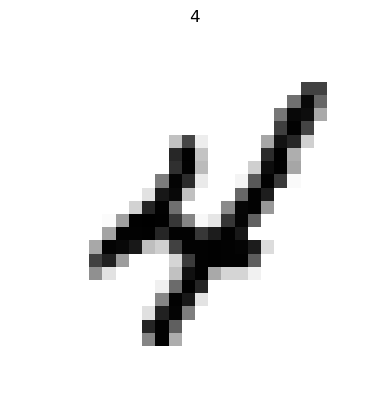

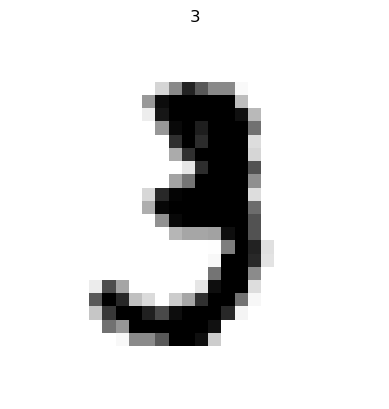

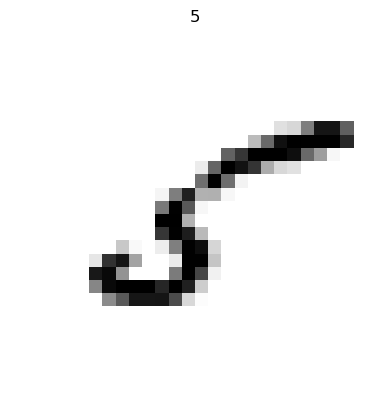

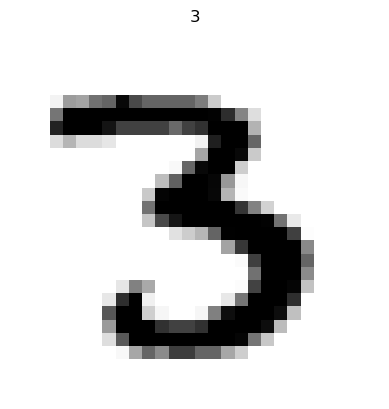

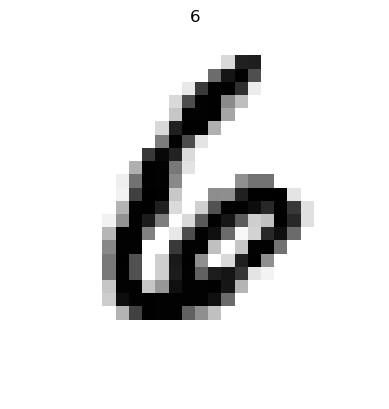

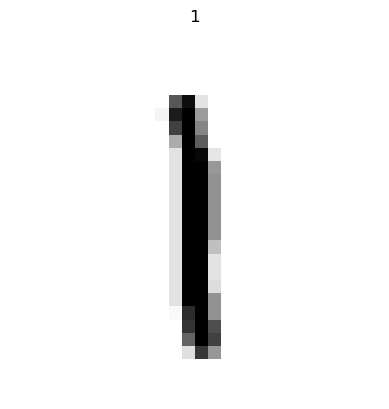

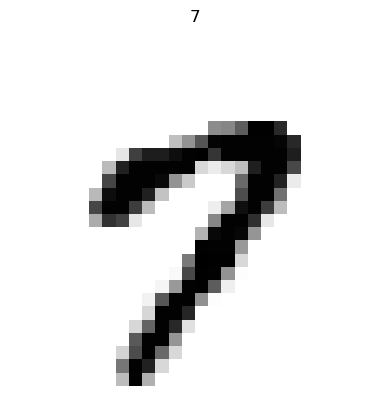

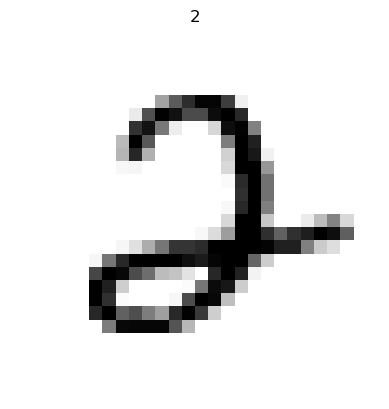

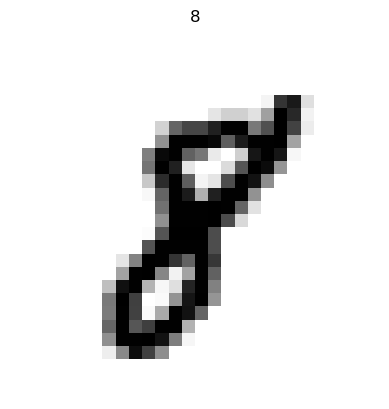

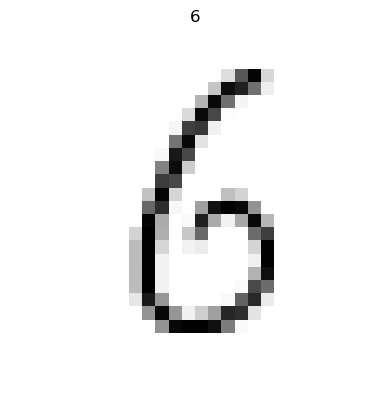

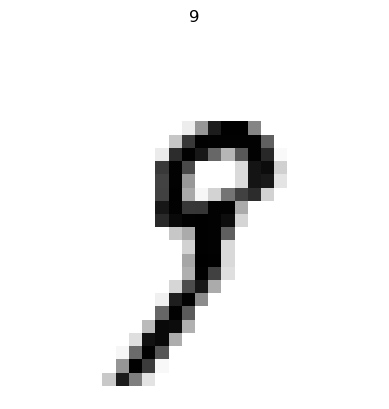

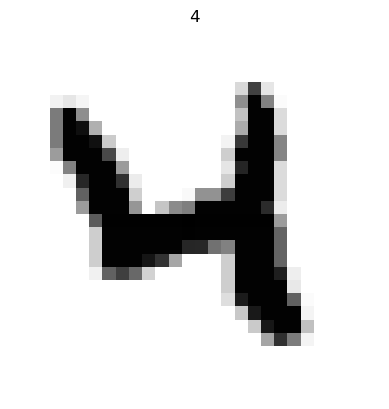

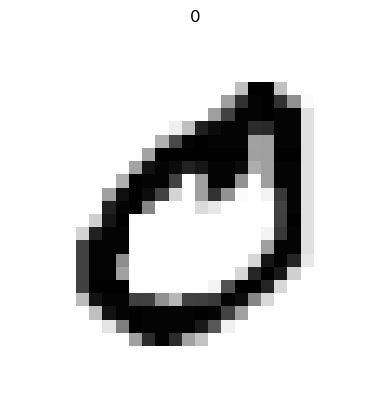

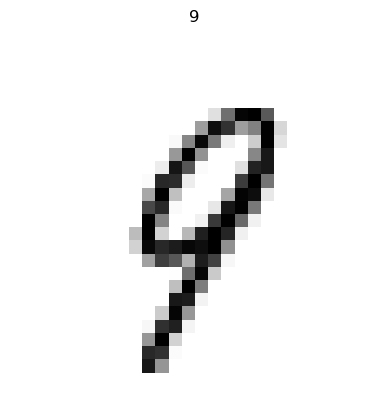

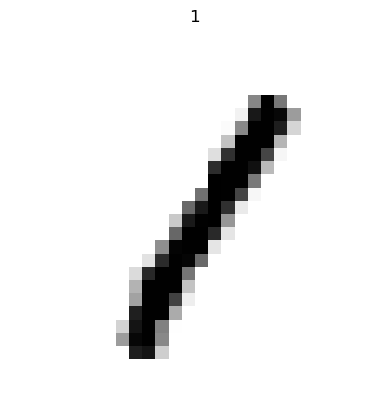

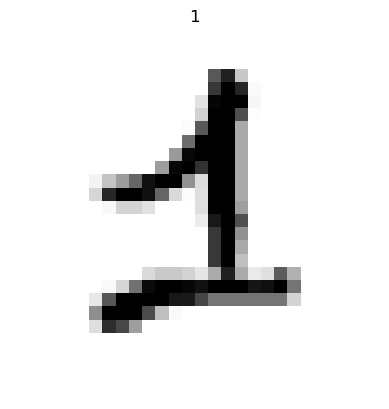

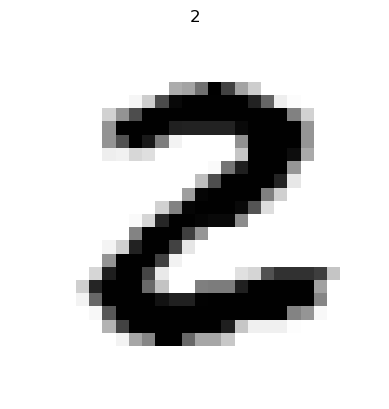

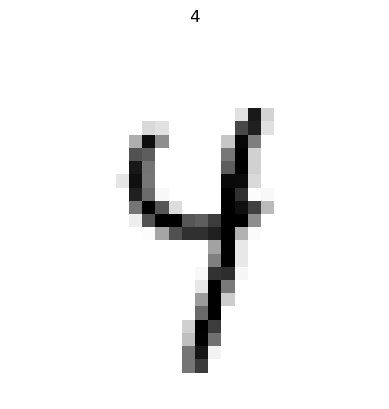

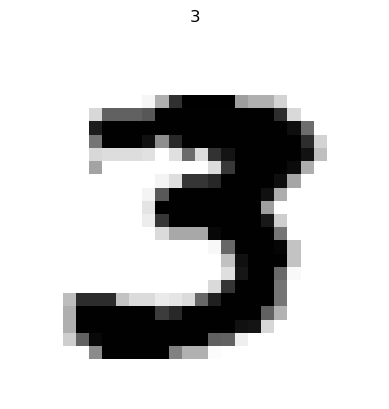

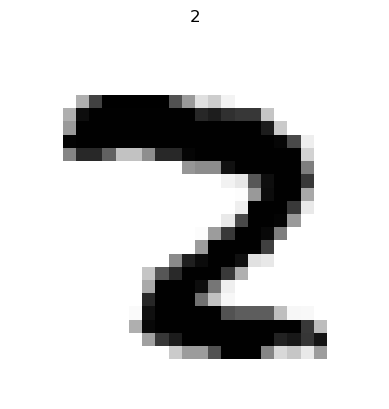

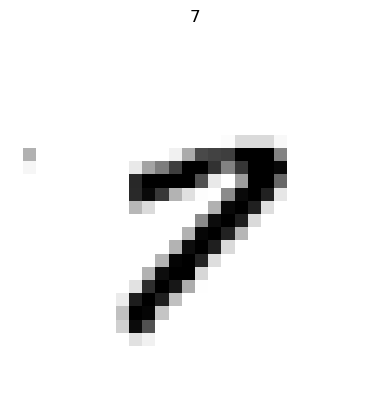

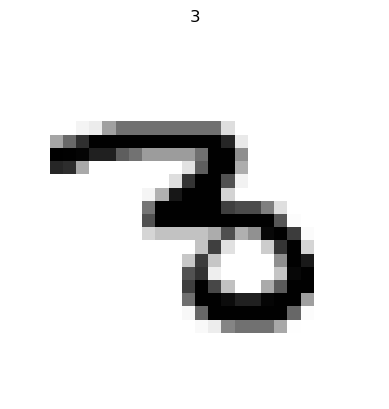

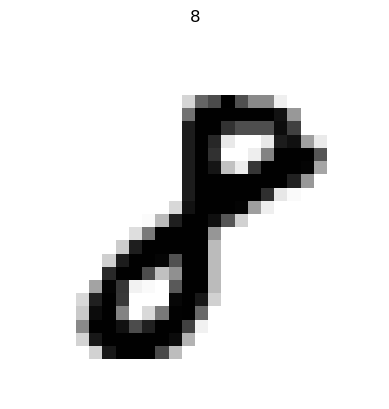

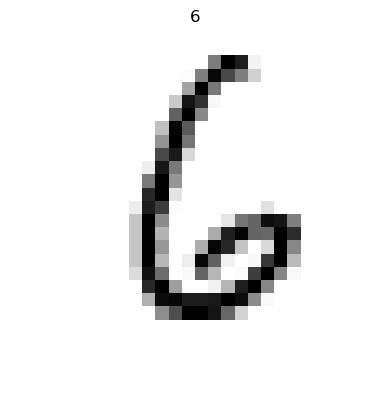

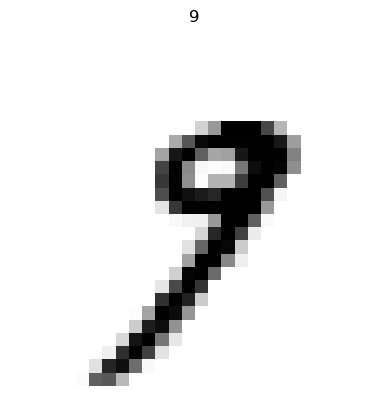

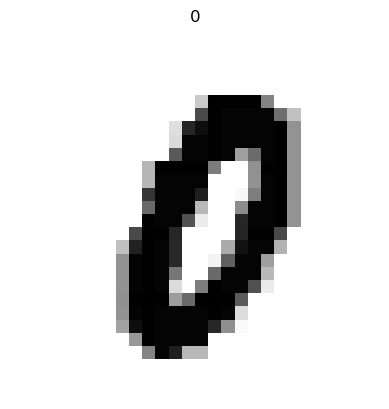

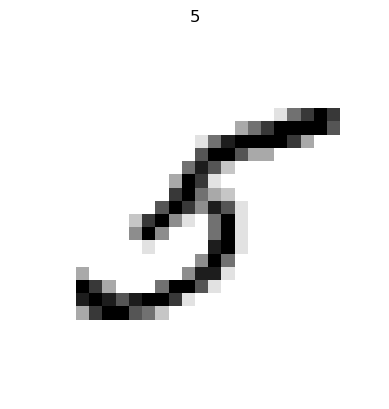

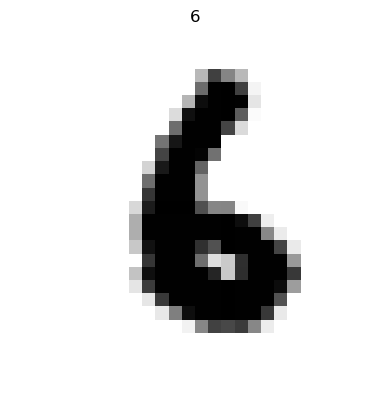

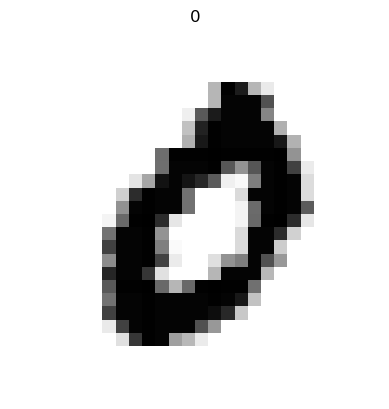

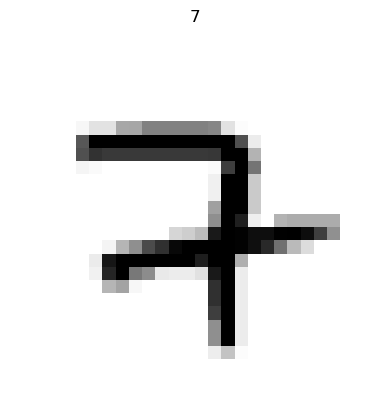

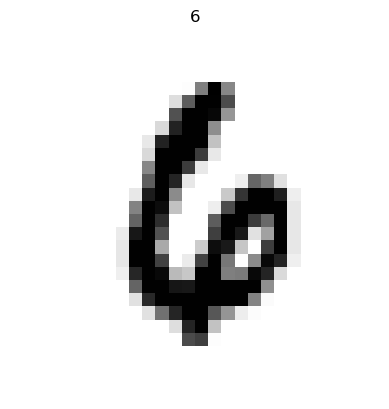

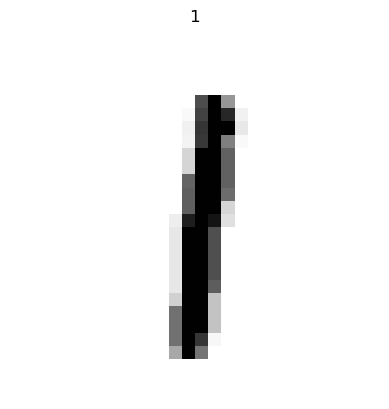

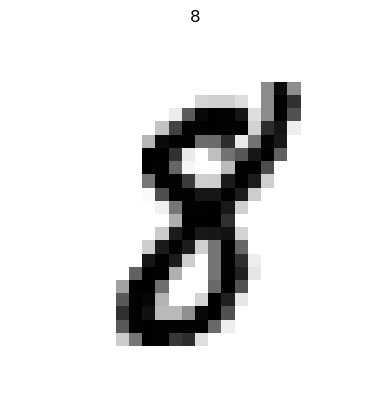

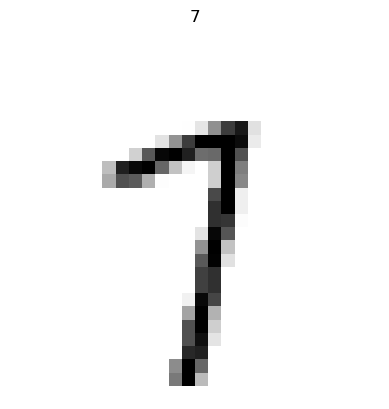

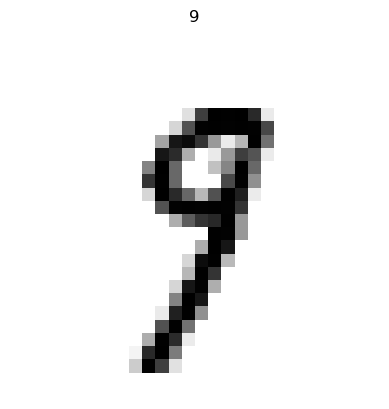

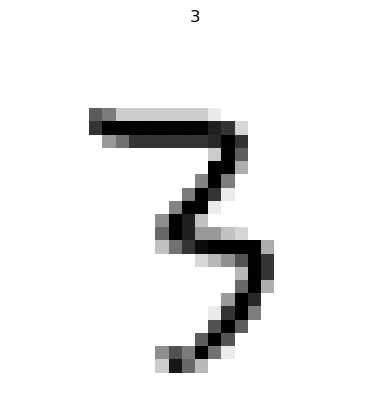

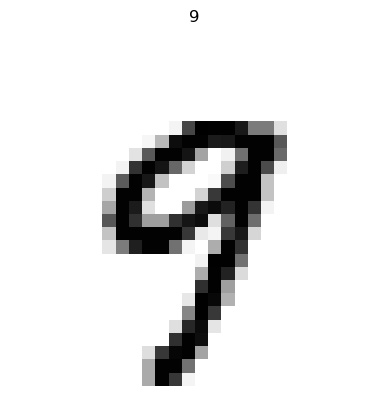

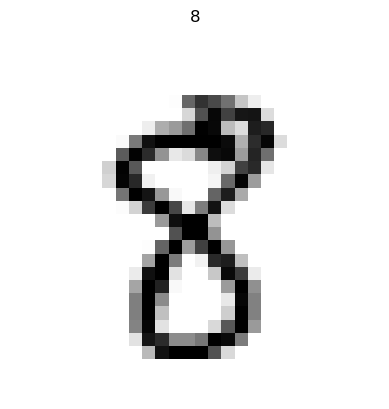

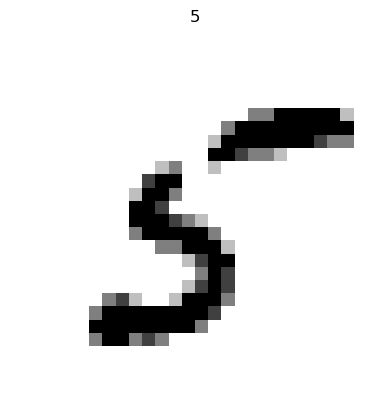

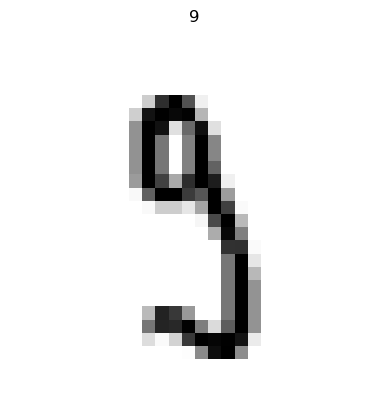

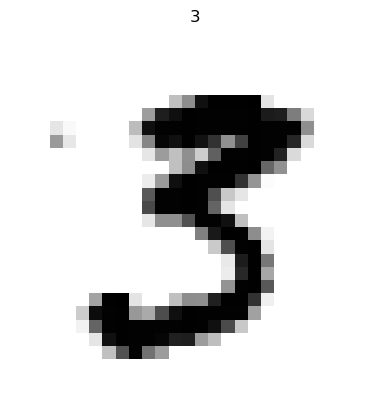

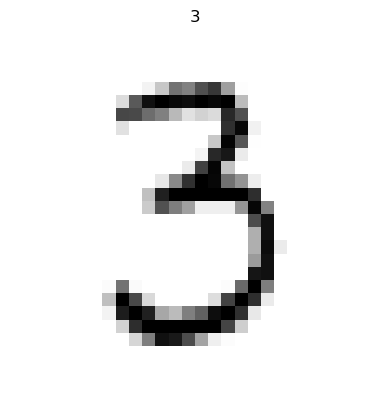

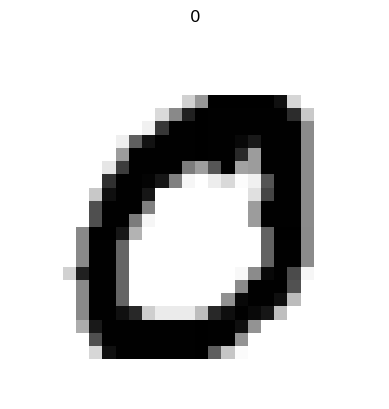

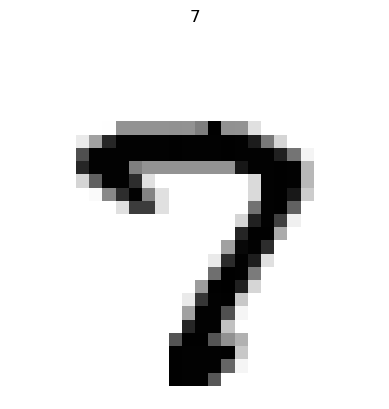

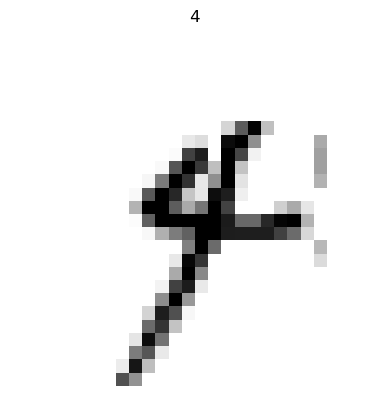

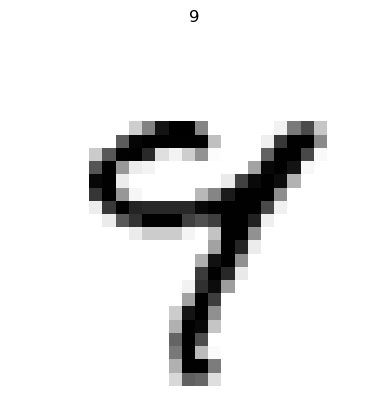

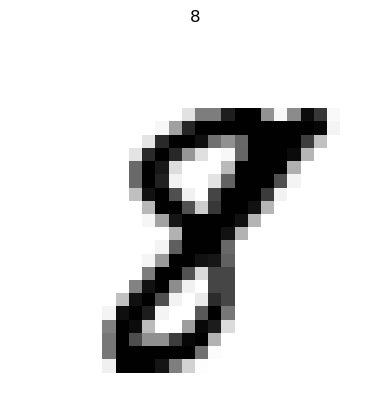

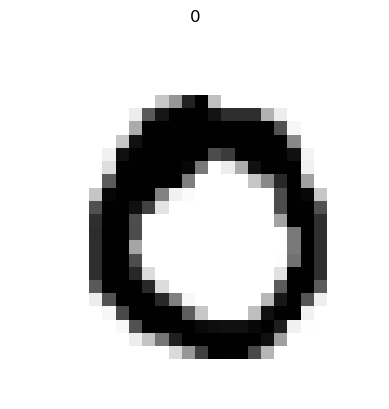

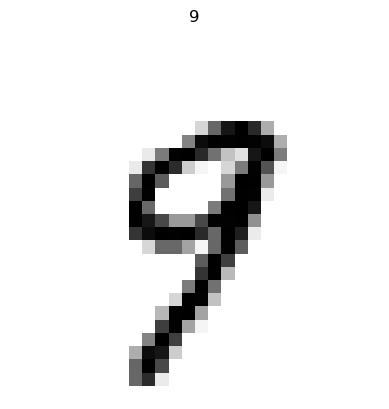

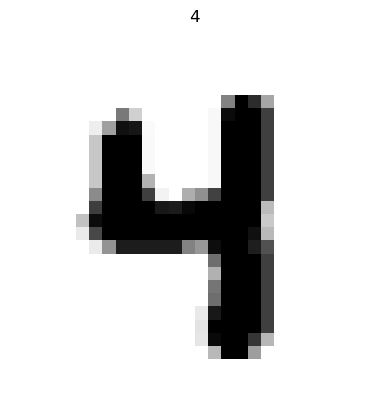

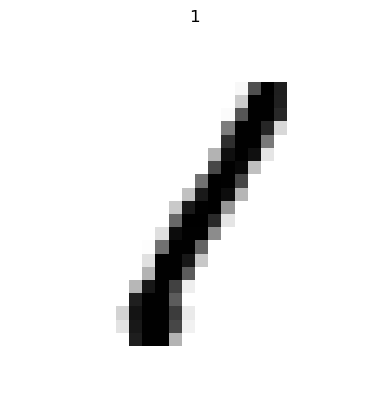

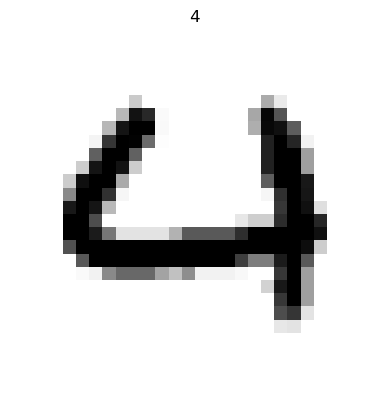

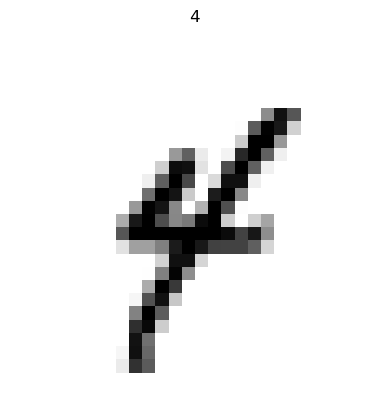

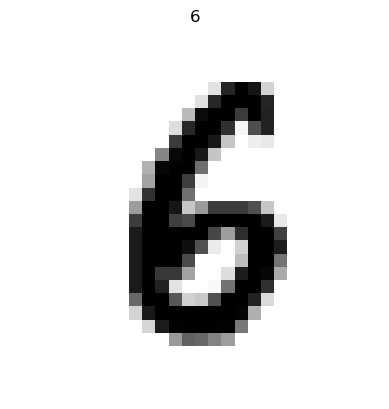

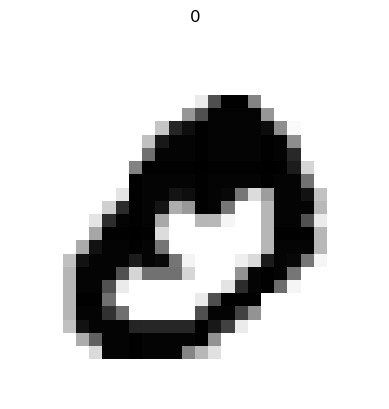

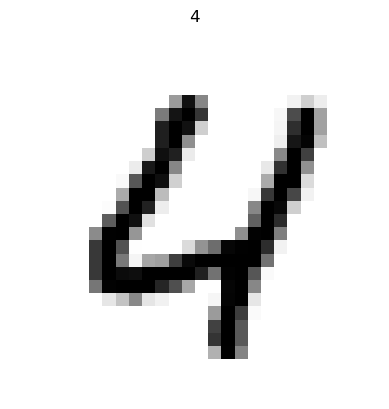

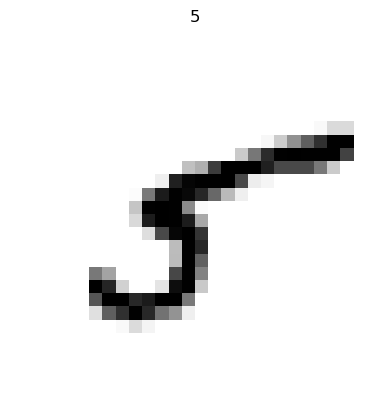

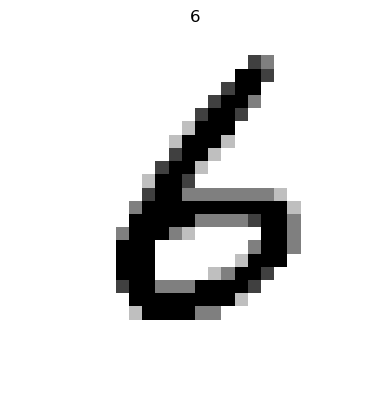

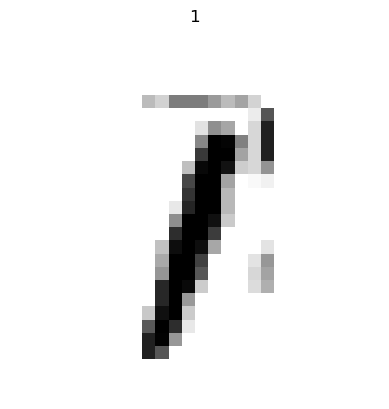

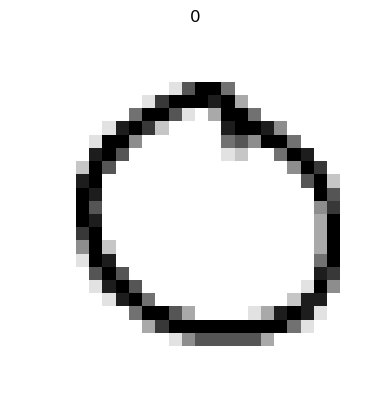

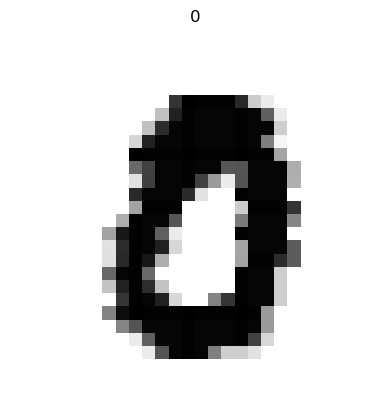

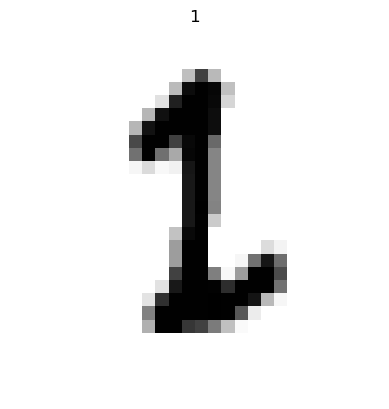

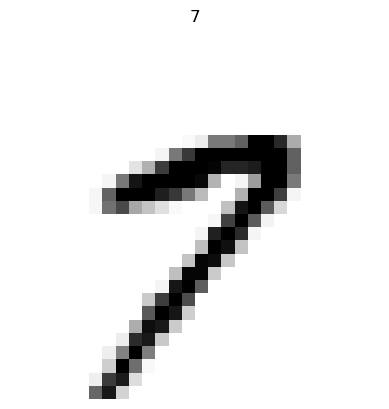

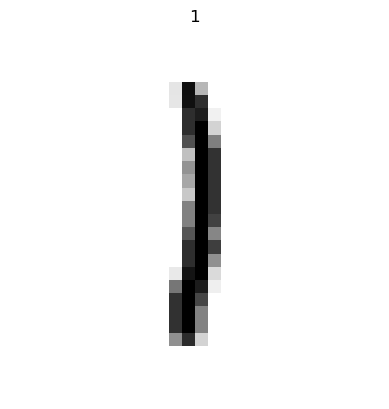

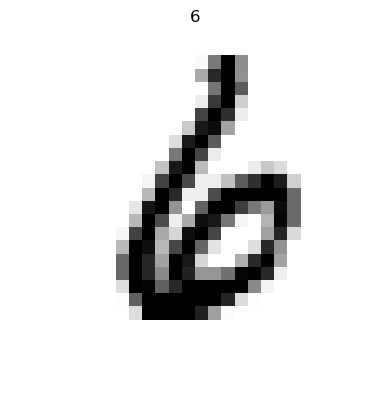

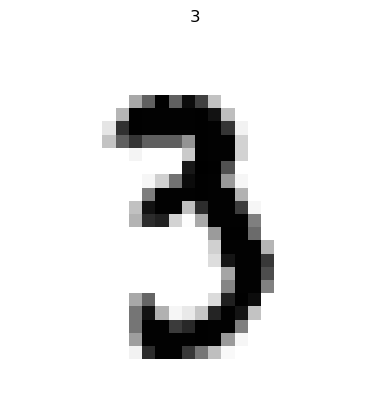

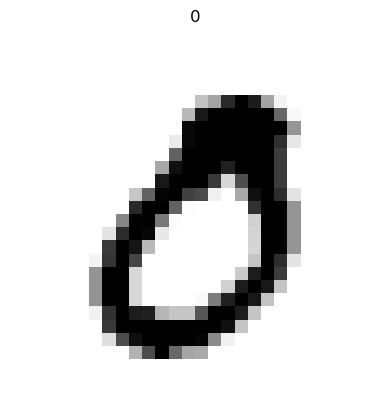

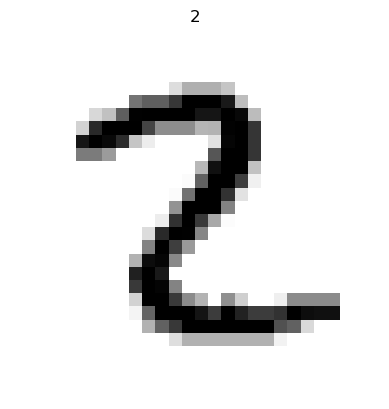

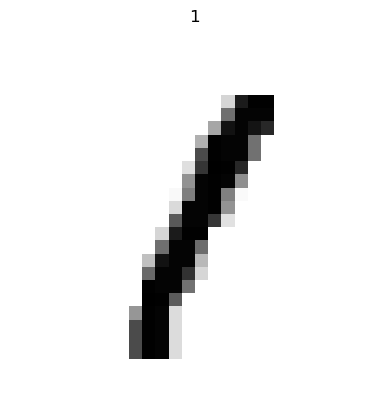

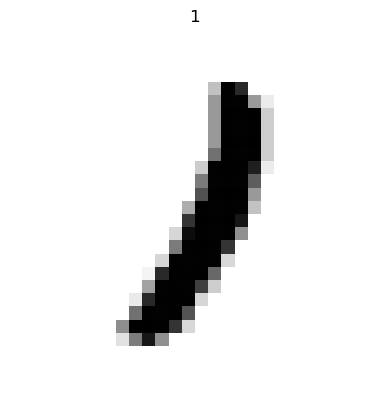

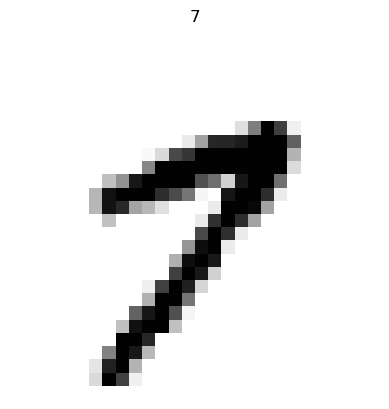

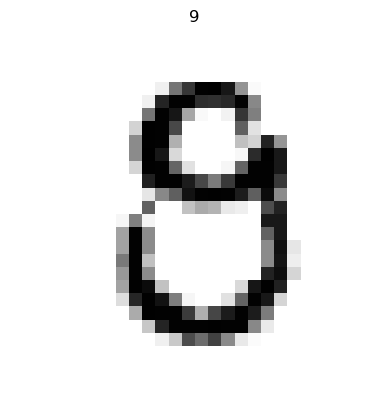

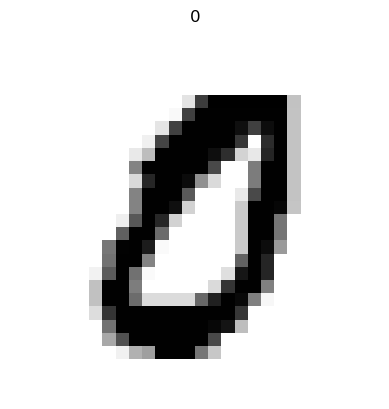

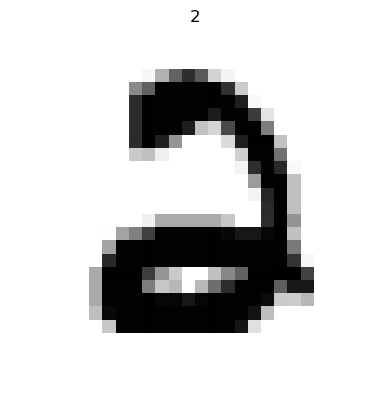

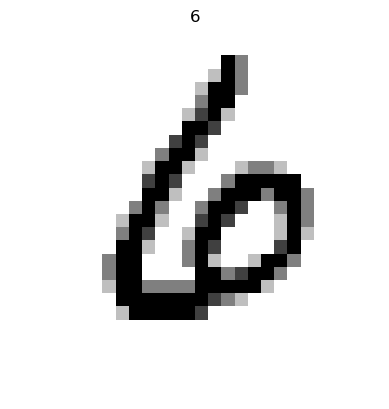

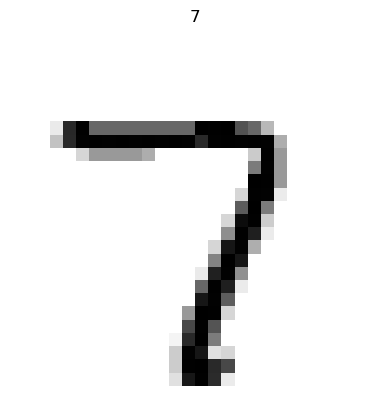

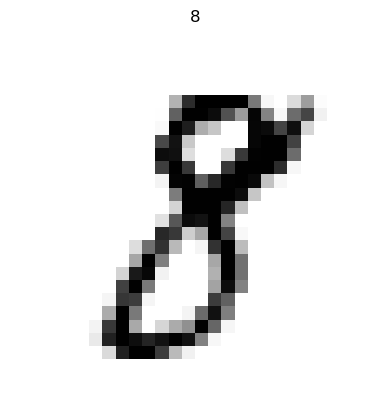

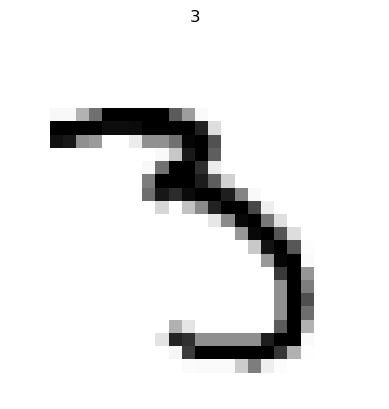

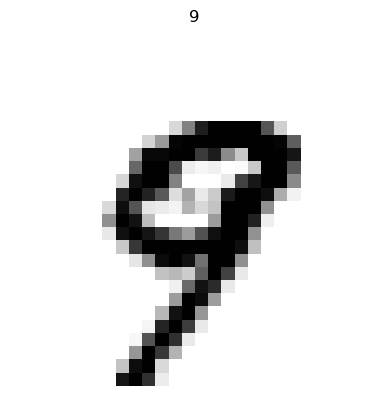

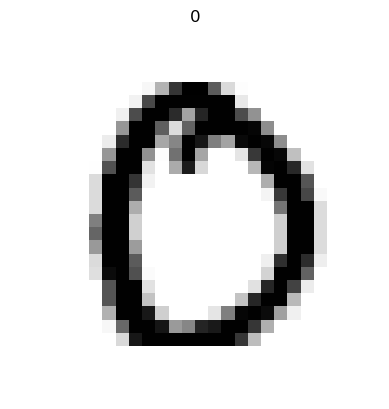

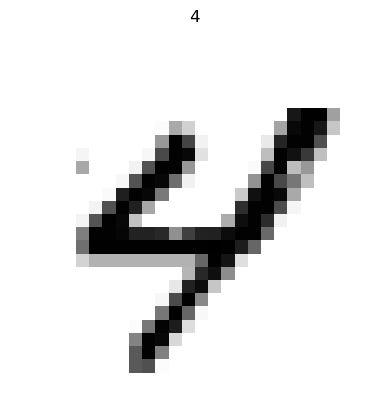

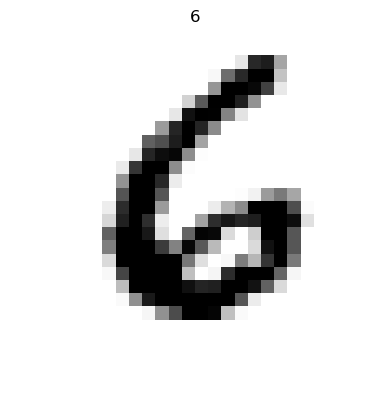

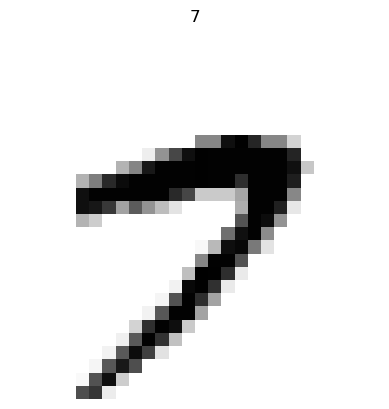

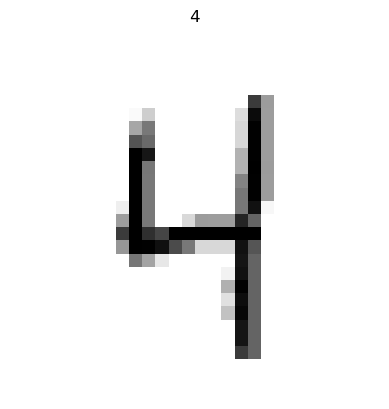

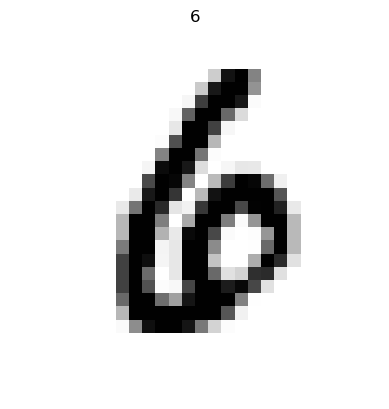

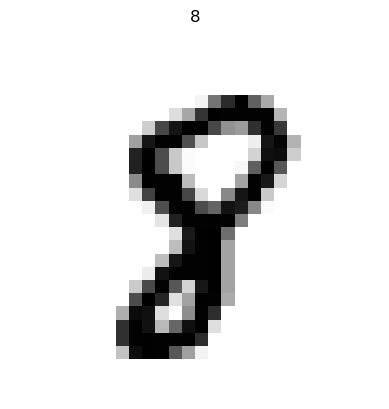

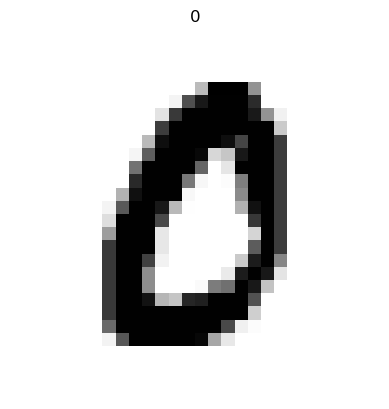

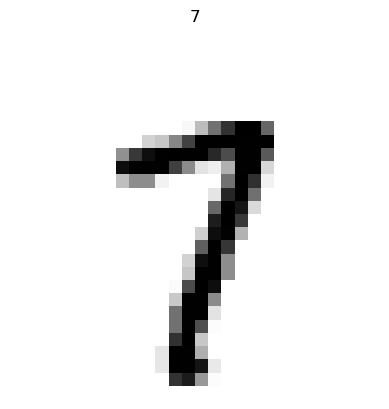

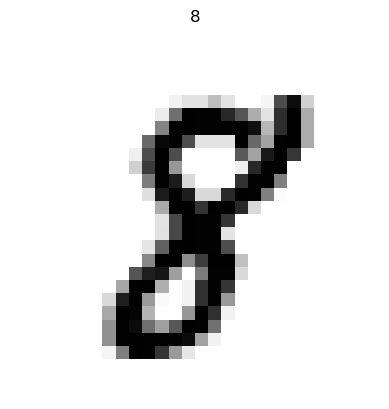

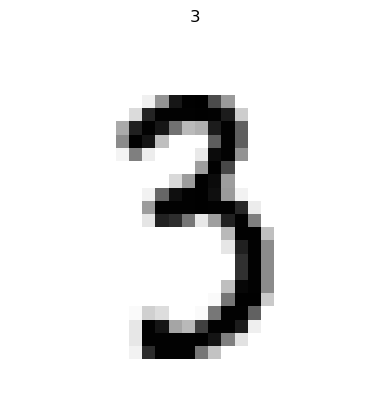

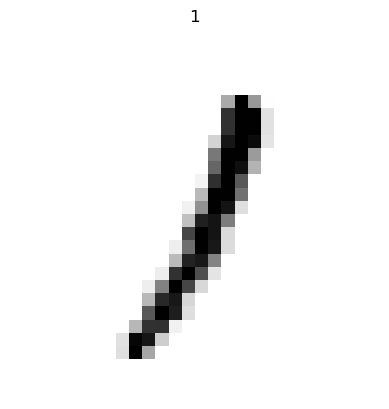

In [6]:
for i in range(100):
    plot_input_img(i)


In [7]:
#pre process data
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255
#reshape or expand the dimentions of images to (28,28)
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)


In [8]:
#convert classes to one hot vector
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [9]:
model = Sequential()

model.add(Conv2D(32,(3,3),input_shape = (28,28,1) , activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,(3,3) , activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(10,activation="softmax"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [11]:
model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy,metrics=['accuracy'])

In [12]:
#callbacks

from keras.callbacks import EarlyStopping, ModelCheckpoint
#earlystopping
es= EarlyStopping(monitor='accuracy', min_delta=0.01,patience=4, verbose=1 )
#model check point
mc=ModelCheckpoint("./bestmodel.h5",monitor="accuracy",verbose=1,save_best_only=True)

cb = [es,mc]

In [16]:
#model train
his=model.fit(X_train, y_train , epochs=5, validation_split=0.3, callbacks=cb)

Epoch 1/5
1309/1313 [============================>.] - ETA: 0s - loss: 0.0065 - accuracy: 0.9936
Epoch 1: accuracy improved from 0.99319 to 0.99352, saving model to .\bestmodel.h5
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0065 - accuracy: 0.9935 - val_loss: 0.0088 - val_accuracy: 0.9902
Epoch 2/5
1309/1313 [============================>.] - ETA: 0s - loss: 0.0059 - accuracy: 0.9944
Epoch 2: accuracy improved from 0.99352 to 0.99445, saving model to .\bestmodel.h5
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0059 - accuracy: 0.9945 - val_loss: 0.0084 - val_accuracy: 0.9903
Epoch 3/5
1310/1313 [============================>.] - ETA: 0s - loss: 0.0057 - accuracy: 0.9947
Epoch 3: accuracy improved from 0.99445 to 0.99471, saving model to .\bestmodel.h5
1313/1313 [==============================] - 14s 10ms/step - loss: 0.0057 - accuracy: 0.9947 - val_loss: 0.0093 - val_accuracy: 0.9902
Epoch 4/5
1311/1313 [============================>.] - 

In [14]:
model_S=keras.models.load_model("D://programming//python for ml//New folder//bestmodel.h5")

In [15]:
score = model_S.evaluate(X_test,y_test)
print(f",odel accuracy is {score[1]}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0075 - accuracy: 0.9918
,odel accuracy is 0.9918000102043152
